<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/AD_JAN24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


> The Falah/Alzheimer_MRI Disease Classification dataset is a valuable resource for researchers and health medicine applications. This dataset focuses on the classification of Alzheimer's disease based on MRI scans. The dataset consists of brain MRI images labeled into four categories:

- '0': Mild_Demented
- '1': Moderate_Demented
- '2': Non_Demented
- '3': Very_Mild_Demented



In [7]:
from datasets import load_dataset

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Print the number of examples
print("Number of examples:", len(dataset))

# Print the structure of the first example
print("Structure of the first example:")
print(dataset[0])

# Print the keys of the first example (if it's a dictionary)
if isinstance(dataset[0], dict):
    print("Keys in the first example:", dataset[0].keys())

# Print the first few samples
print("Sample data:")
for example in dataset[:5]:
    print(example)

Number of examples: 5120
Structure of the first example:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F58A93800D0>, 'label': 2}
Keys in the first example: dict_keys(['image', 'label'])
Sample data:
image
label


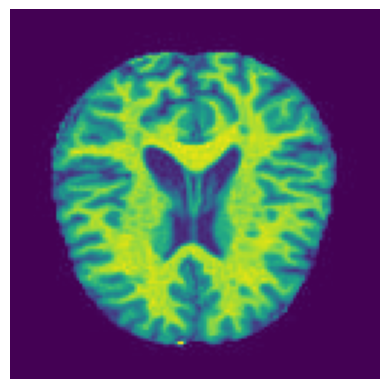

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the image is stored under the key 'image' in the dataset
image = dataset[0]['image']

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

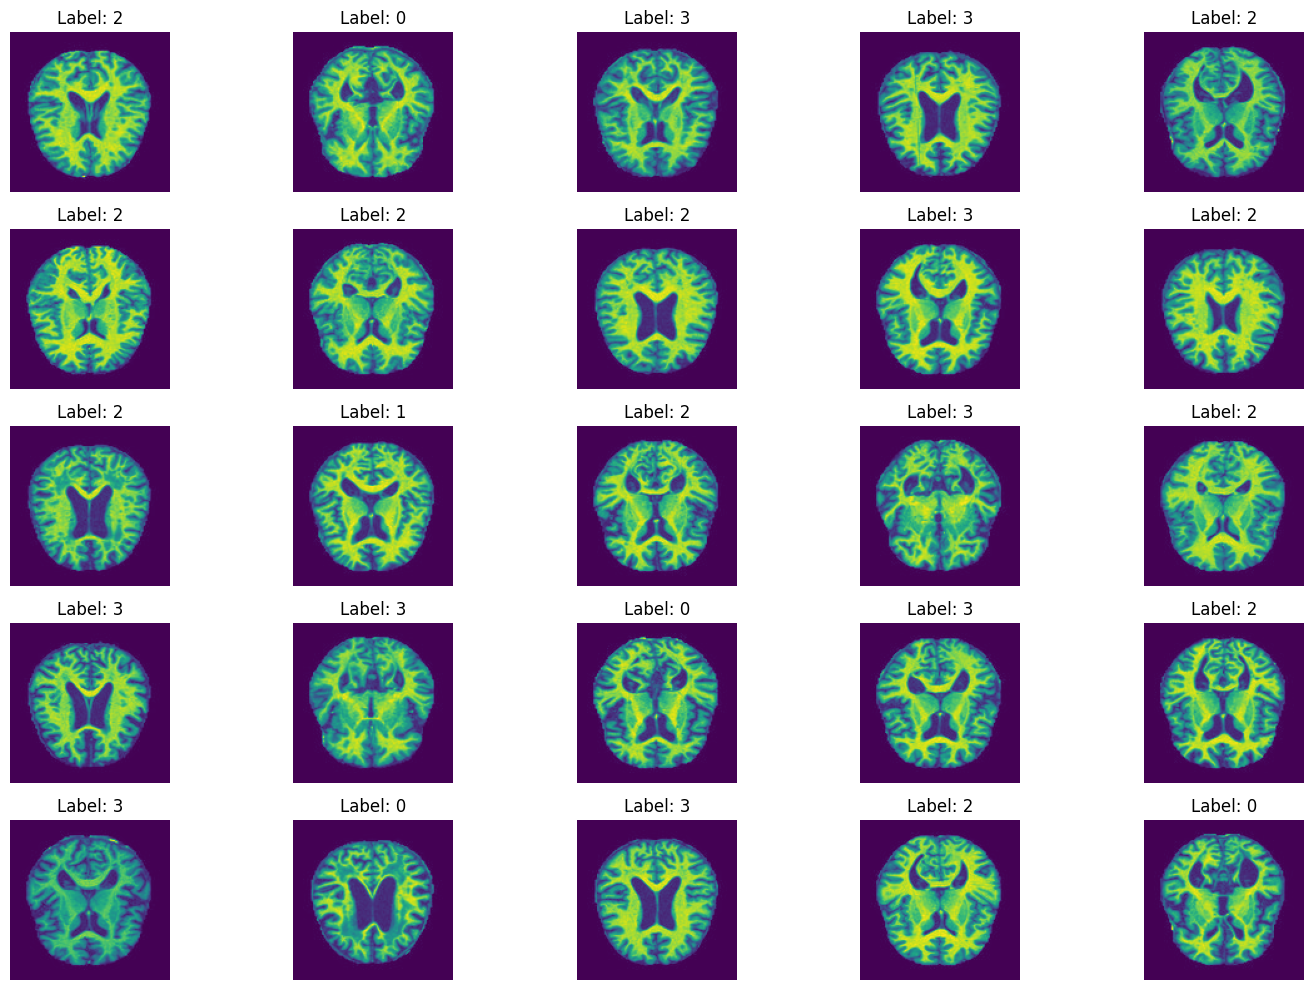

In [13]:
# Display 25 images with their labels
plt.figure(figsize=(15, 10))  # Set the figure size
for i in range(25):
    # Get the image and label
    image = dataset[i]['image']
    label = dataset[i]['label']

    # Plot the image
    plt.subplot(5, 5, i + 1)  # Arrange images in a grid (2 rows, 5 columns)
    plt.imshow(image)  # Display the image
    plt.title(f"Label: {label}")  # Set the title as the label
    plt.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

Label distribution: Counter({2: 2566, 3: 1781, 0: 724, 1: 49})


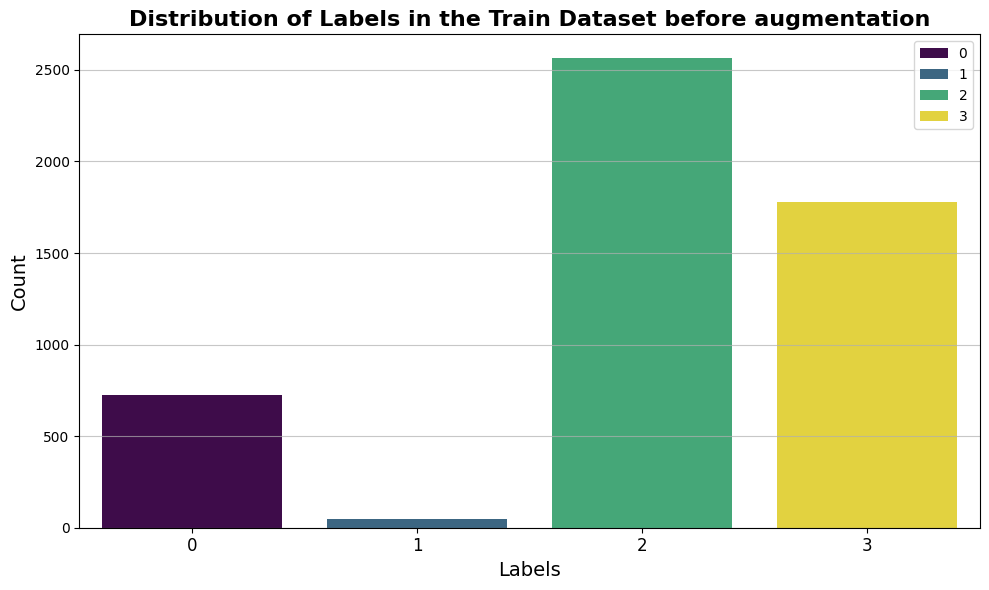

In [30]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Extract labels (assuming the key is 'label')
labels = [int(example['label']) for example in dataset]  # Convert labels to integers

# Count the occurrences of each label
label_counts = Counter(labels)

# Print the label distribution
print("Label distribution:", label_counts)

# Set a better color palette
sns.set_palette("muted")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis",hue=list(label_counts.keys()))

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels in the Train Dataset before augmentation', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

# Customize x-axis to show only integer labels
plt.xticks(list(label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Label distribution: Counter({2: 634, 3: 459, 0: 172, 1: 15})


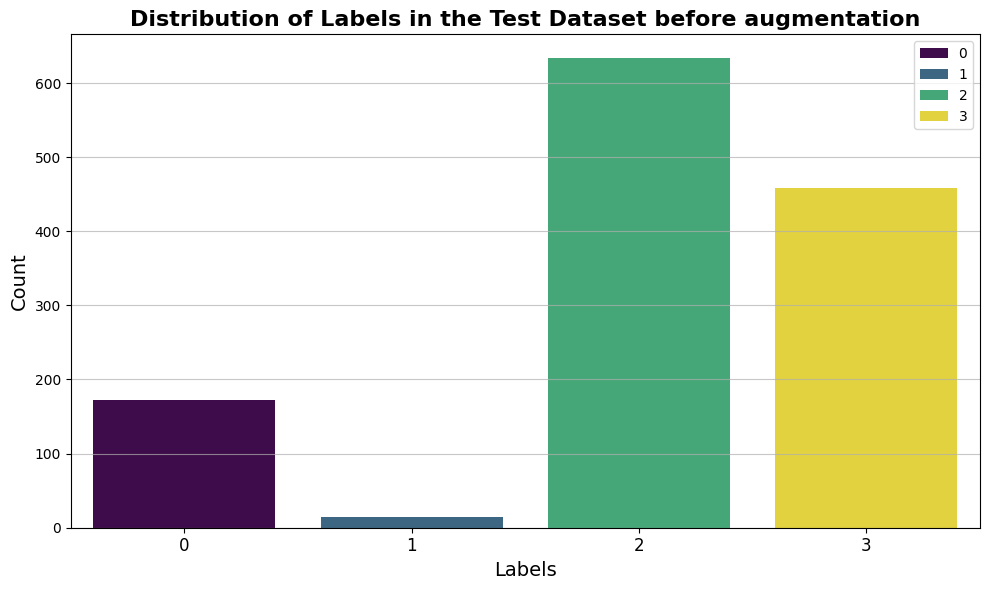

In [29]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='test')

# Extract labels (assuming the key is 'label')
labels = [int(example['label']) for example in dataset]  # Convert labels to integers

# Count the occurrences of each label
label_counts = Counter(labels)

# Print the label distribution
print("Label distribution:", label_counts)

# Set a better color palette
sns.set_palette("pastel")  # You can choose other palettes like "deep", "muted", "bright", etc.

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis",hue=list(label_counts.keys()))

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels in the Test Dataset before augmentation', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

# Customize x-axis to show only integer labels
plt.xticks(list(label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

> Data augmentation is a powerful technique to increase the diversity of your training dataset by applying random transformations such as rotations, flips, zooms, and more. This helps improve the generalization of your model, especially when the dataset is small or imbalanced.

